In [7]:
import pandas as pd
#%matplotlib notebook
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import dateutil.parser
import time


from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

#from bokeh.io import hplot, output_file, show
from bokeh.plotting import figure

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
#output_notebook()
import plotlib as pltme

In [8]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
directory = directory + '1-node/'

In [9]:
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)

def producer_throughtput_per_mini_batch(adir,producers):
    
    from operator import add
    
    first_pass = True
    for producer in producers:
        producer_data =  pd.read_csv(adir + producer)
        timestamps = producer_data['TimeStamp']
        timestamps_list = timestamps.tolist()
        sent_messages_count = 0
        message_list = []
        start_time  = time.mktime(dateutil.parser.parse(timestamps_list[0]).timetuple()) 
        
        for atime in timestamps_list:
            cur_time = time.mktime(dateutil.parser.parse(atime).timetuple()) 
            if abs(start_time - cur_time) > 60: 
                message_list.append(sent_messages_count)
                start_time = cur_time
                sent_messages_count = 0
            else:
                sent_messages_count+=1
        
        ## I only create this list the first time, becasue I need to know the size of the list
        if first_pass:
            all_messages_list = [0]*len(message_list)
            first_pass=False
        
        while len(all_messages_list) < len(message_list):
            all_messages_list.append(0)
        
        while len(message_list) < len(all_messages_list):
            message_list.append(0)
            
        all_messages_list = map(add,all_messages_list,message_list)
            
    mb_per_second = []
    for record in all_messages_list:
        mb = (record*8*5000*3/1024**2)/60   # (record*DoublePrecisionFloat_bytes*Total_points*dimensions_of_points/convertion_to_mbs)/window_size)
        mb_per_second.append(mb)
        
    x_axis = np.linspace(1,len(all_messages_list),num=len(all_messages_list),endpoint=True)
                
    return (x_axis,all_messages_list,mb_per_second)
        
    
    

## 8-1-1 new settings

In [11]:
#throughput_p811_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
#throughin_811 = pltme.plot_throughput_per_mini_batch('8-1-1-new-settings/spark-metrics-20171108-105454.csv',1,showPlot=False)
#processing_time_811 =  pltme.plot_scheduling_and_Total_Delay('8-1-1-new-settings/spark-metrics-20171108-105454.csv',1,'title',showPlot=True)
#processing_records_per_second_per_batch_811 = pltme.rec_per_sec(processing_time_811,throughin_811)
#average_record_throughin = pltme.find_total_consumer_throughin('8-1-2-new-settings/spark-metrics-20171107-234051.csv',17*60)  #5400
#print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
#producers = '8-1-1-new-settings/producers/'
#adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-1-new-settings/producers/'
#dataset =  pltme.find_producers_file(adir)
#avg_production_rate_811 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

## 8-1-2-new settings

In [58]:
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)

throughput_p812_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_812 = pltme.plot_throughput_per_mini_batch('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,showPlot=False)
processing_time_812 =  pltme.plot_scheduling_and_Total_Delay('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_812 = pltme.rec_per_sec(processing_time_812,throughin_812)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-2-new-settings/spark-metrics-20171107-234051.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_812 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 174 Records/sec 


(0, 20)

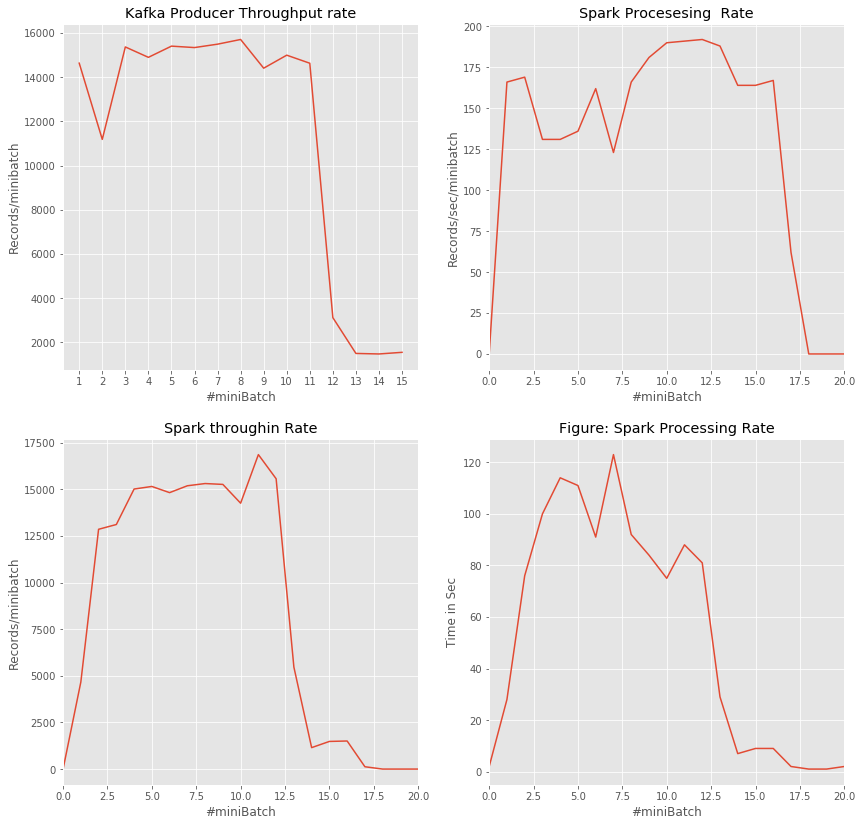

In [59]:
temp = 20
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False)
fig.set_size_inches(14,14)
#plt.subplot(221)
axes[0,0].plot(throughput_p812_1[0],throughput_p812_1[1])    # [1] : has the rate in Records whereas [2] has the data in MB/s
axes[0,0].set_yscale('linear')
axes[0,0].set_title('Kafka Producer Throughput rate')  #set_title('Avg Prod Rate: ' + str(avg_production_rate_812[0]) + " Rec/sec or " + str(avg_production_rate_812[0]*5000*3*8/1024**2) + " MB/s")
axes[0,0].set_xlabel('#miniBatch')
axes[0,0].set_ylabel('Records/minibatch')
axes[0,0].set_xticks(throughput_p812_1[0])
#ax.set_xticks(range(6))
#ax.set_xticklabels([str(x)+"foo" for x in range(6)], rotation=45

#plt.subplot(222)
axes[0,1].plot(processing_records_per_second_per_batch_812[0],processing_records_per_second_per_batch_812[1])
axes[0,1].set_title('Spark Procesesing  Rate')
axes[0,1].set_ylabel('Records/sec/minibatch')
axes[0,1].set_xlabel('#miniBatch')
axes[0,1].set_xlim([0, temp])


#plt.subplot(223)
axes[1,0].plot(throughin_812[0],throughin_812[1])
axes[1,0].set_title('Spark throughin Rate')
axes[1,0].set_ylabel('Records/minibatch')
axes[1,0].set_xlabel('#miniBatch')
axes[1,0].set_xlim([0, temp])


#plt.subplot(224)
axes[1,1].plot(processing_time_812[0],processing_time_812[1])
axes[1,1].set_title('Figure: Spark Processing Rate')
axes[1,1].set_xlabel('#miniBatch')
axes[1,1].set_ylabel('Time in Sec')
axes[1,1].set_xlim([0, temp])


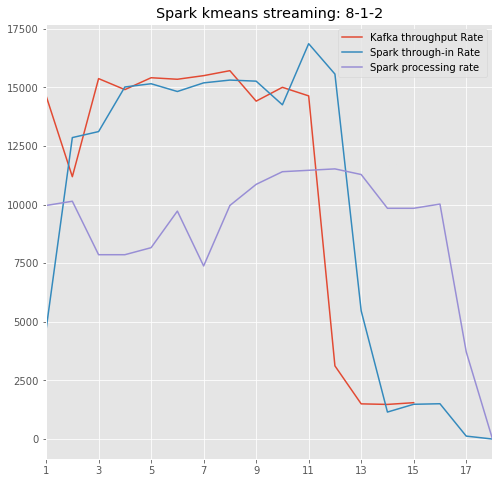

In [60]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 8-1-2')
ax.set_xlim([1,18])
ax.set_xticks([1,3,5,7,9,11,13,15,17])


#throughput rate
ax.plot(throughput_p812_1[0],throughput_p812_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_812[0],throughin_812[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_812[0],map(lambda x: x*60,processing_records_per_second_per_batch_812[1]),label='Spark processing rate')

ax.legend()

## Spark 8-1-4

In [62]:
## all producers
producers = '8-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-4-new-settings/producers/'

dataset =  pltme.find_producers_file(adir)
avg_production_rate_814 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

#throughput_p814_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_814 = pltme.plot_throughput_per_mini_batch('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,showPlot=False)
processing_time_814 =  pltme.plot_scheduling_and_Total_Delay('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_814 = pltme.rec_per_sec(processing_time_814,throughin_814)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-4-new-settings/spark-metrics-20171027-112554.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin



 Through-in rate is: 174 Records/sec 


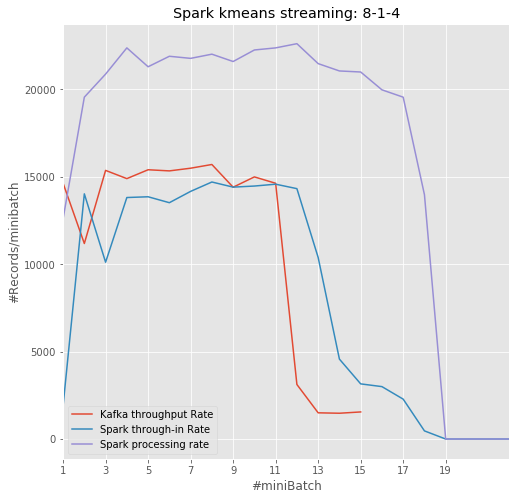

In [63]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 8-1-4')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p814_1[0],throughput_p814_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_814[0],throughin_814[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_814[0],map(lambda x: x*60,processing_records_per_second_per_batch_814[1]),label='Spark processing rate')

ax.legend()

## Spark 16-1-8

In [65]:
## all producers
producers = '16-1-8-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/16-1-8-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)


avg_production_rate_1618 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')
throughput_p1618_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_1618 = pltme.plot_throughput_per_mini_batch('16-1-8-new-settings/spark-metrics-20171108-152905.csv',1,showPlot=False)
processing_time_1618 =  pltme.plot_scheduling_and_Total_Delay('16-1-8-new-settings/spark-metrics-20171108-152905.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_1618 = pltme.rec_per_sec(processing_time_1618,throughin_1618)
average_record_throughin = pltme.find_total_consumer_throughin('16-1-8-new-settings/spark-metrics-20171108-152905.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin



 Through-in rate is: 348 Records/sec 


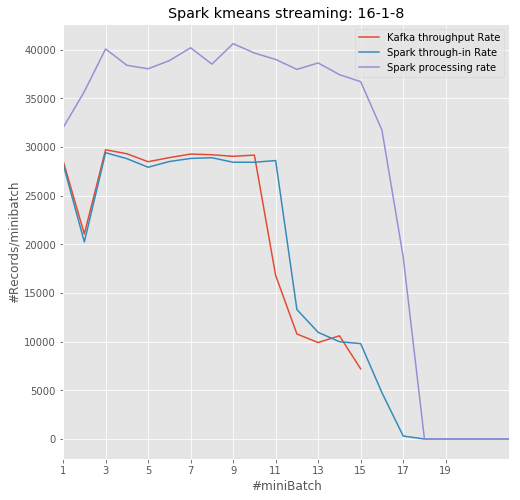

In [66]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 16-1-8')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p1618_1[0],throughput_p1618_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_1618[0],throughin_1618[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_1618[0],map(lambda x: x*60,processing_records_per_second_per_batch_1618[1]),label='Spark processing rate')

ax.legend()

## Spark k-means 16-1-4

In [68]:
## all producers
producers = '16-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/16-1-4-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)


avg_production_rate_1614 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')
throughput_p1614_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_1614 = pltme.plot_throughput_per_mini_batch('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,showPlot=False)
processing_time_1614 =  pltme.plot_scheduling_and_Total_Delay('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_1614 = pltme.rec_per_sec(processing_time_1614,throughin_1614)
average_record_throughin = pltme.find_total_consumer_throughin('16-1-4-new-settings/spark-metrics-20171027-153623.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

 Through-in rate is: 348 Records/sec 


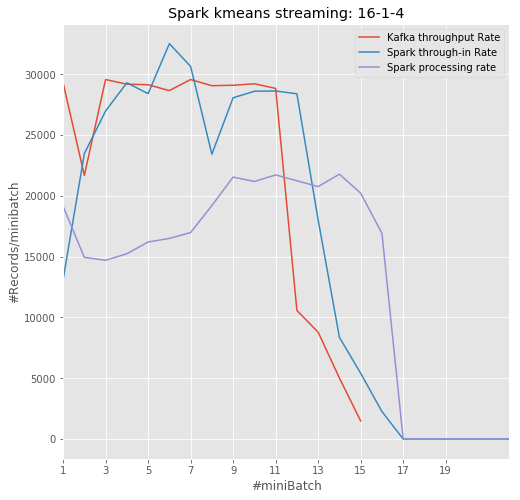

In [69]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = plt.axes()


ax.set_title('Spark kmeans streaming: 16-1-4')
ax.set_xlim([1,22])
ax.set_xticks([1,3,5,7,9,11,13,15,17,19])
ax.set_xlabel('#miniBatch')
ax.set_ylabel('#Records/minibatch')


#throughput rate
ax.plot(throughput_p1614_1[0],throughput_p1614_1[1],label='Kafka throughput Rate') 

# through-in rate
ax.plot(throughin_1614[0],throughin_1614[1],label='Spark through-in Rate')

# processing rate .  
ax.plot(processing_records_per_second_per_batch_1614[0],map(lambda x: x*60,processing_records_per_second_per_batch_1614[1]),label='Spark processing rate')

ax.legend()

# Creating the model plot

In [70]:
## 8-1-2
# through-put rate
mean_throughput_p_812, std_throughput_p_812 = np.mean(throughput_p812_1[1]), np.std(throughput_p812_1[1])    # records

# processing rate 
rate = map(lambda x: x*60,processing_records_per_second_per_batch_812[1])
mean_processing_records_812 , std_processing_records_812 = np.mean(rate)  , np.std(rate)

#through-in
mean_throughin_812 , std_throughin_812 = np.mean(throughin_812[1]) , np.std(throughin_812[1])   



In [71]:
mean_throughput_p_812 , mean_processing_records_812, mean_throughin_812

(11315.533333333333, 1490.5555555555557, 1646.0740740740741)

In [73]:
## 8-1-4
# through-put rate
mean_throughput_p_814, std_throughput_p_814 = np.mean(throughput_p814_1[1]), np.std(throughput_p814_1[1])    # records

# processing rate 
rate = map(lambda x: x*60,processing_records_per_second_per_batch_814[1])
mean_processing_records_814 , std_processing_records_814 = np.mean(rate)  , np.std(rate)

#through-in
mean_throughin_814 , std_throughin_814 = np.mean(throughin_814[1]) , np.std(throughin_814[1])  

In [74]:
mean_throughput_p_814 , mean_processing_records_814, mean_throughin_814

(11315.533333333333, 3508.0, 1693.104761904762)

In [149]:
# 16-1- 4

# through-put rate
mean_throughput_p_1614, std_throughput_p_1614 = np.mean(throughput_p1614_1[1]), np.std(throughput_p1614_1[1])    # records

# processing rate 
rate = map(lambda x: x*60,processing_records_per_second_per_batch_81614[1])
mean_processing_records_1614 , std_processing_records_1614 = np.mean(rate)  , np.std(rate)

#through-in
mean_throughin_1614 , std_throughin_1614 = np.mean(throughin_1614[1]) , np.std(throughin_1614[1]) 

mean_throughput_p_1614 , mean_processing_records_1614, mean_throughin_1614

(22609.133333333335, 2761.6666666666665, 3292.1481481481483)

In [151]:
# 16-1- 8

# through-put rate
mean_throughput_p_1618, std_throughput_p_1618 = np.mean(throughput_p1618_1[1]), np.std(throughput_p1618_1[1])    # records

# processing rate 
rate = map(lambda x: x*60,processing_records_per_second_per_batch_1618[1])
mean_processing_records_1618 , std_processing_records_1618 = np.mean(rate)  , np.std(rate)

#through-in
mean_throughin_1618 , std_throughin_1618 = np.mean(throughin_1618[1]) , np.std(throughin_1618[1]) 

mean_throughput_p_1618 , mean_processing_records_1618, mean_throughin_1618

(22543.0, 5816.0747663551401, 3322.9158878504672)

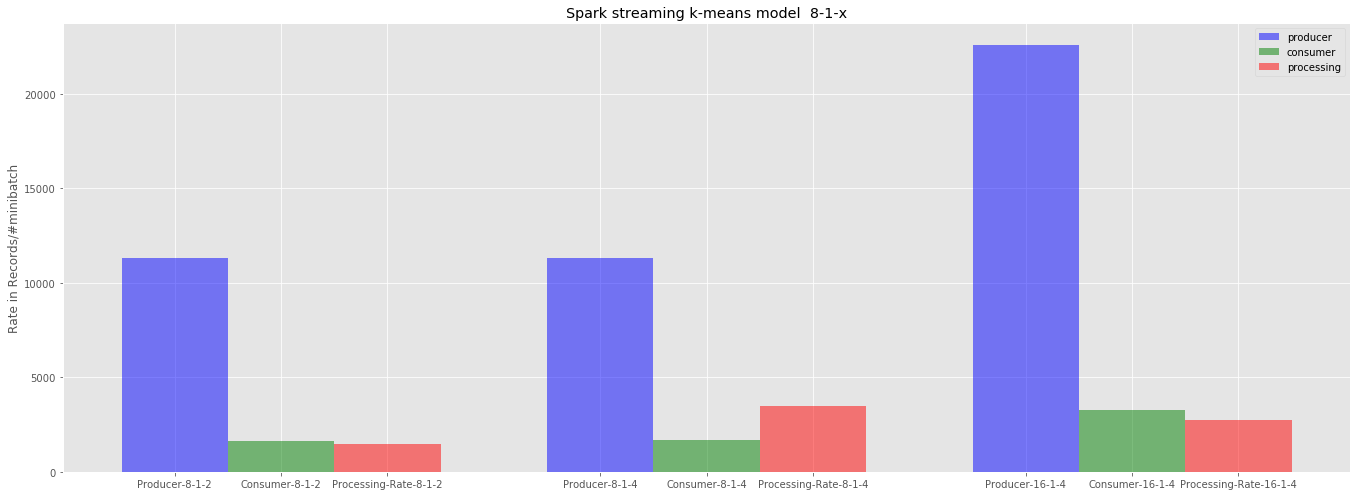

In [155]:
# data to plot
n_groups = 3
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)

#plt.bar(x_pos,[mean_throughput_p_812 ,  mean_throughin_812, mean_processing_records_812,mean_throughput_p_814 , mean_throughin_814, mean_processing_records_814],align='center')

producer_means = (mean_throughput_p_812,mean_throughput_p_814,mean_throughput_p_1614)    # make sure that this is correct

consumer_means = (mean_throughin_812,mean_throughin_814,mean_throughin_1614)

processing_means = (mean_processing_records_812,mean_processing_records_814,mean_processing_records_1614)



    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
fig.set_size_inches(19,7)

objects = ('Producer-8-1-2','Consumer-8-1-2','Processing-Rate-8-1-2','Producer-8-1-4','Consumer-8-1-4','Processing-Rate-8-1-4','Producer-16-1-4','Consumer-16-1-4','Processing-Rate-16-1-4')
x_pos = np.array([0,0.25,0.5,1,1.25,1.5,2.0,2.25,2.5])

bar_width = 0.25
opacity = 0.5
 
    
p_throughput = plt.bar(index, producer_means, bar_width,
                 alpha=opacity,
                 color='b',
                 label='producer')
 
c_throughin = plt.bar(index + bar_width, consumer_means, bar_width,
                 alpha=opacity,
                 color='g',
                 label='consumer')


s_processing_rate =  plt.bar(index + 2*bar_width, processing_means, bar_width,
                 alpha=opacity,
                 color='r',
                 label='processing')



 
plt.title('Spark streaming k-means model  8-1-x')
plt.ylabel('Rate in Records/#minibatch')
plt.xticks(x_pos,(objects))

plt.legend()
plt.tight_layout()
